**แรงเนื่องจากประจุ 2 ตัว**
$$\mathbf{F_{12}}=\frac{Q_1Q_2}{4\pi\epsilon_0}\frac{\mathbf{r_1-r_2}}{|r_1-r_2|^3}$$


In [54]:
import numpy as np
from numpy.linalg import norm
from scipy.constants import pi, epsilon_0

In [33]:
Q1 = 10e-6
Q2 = 25e-6

In [56]:
r1 = np.array([3, 4, 5]) * 1e-2
r2 = np.array([-1, 2, -3]) * 1e-2

In [57]:
R = r1 - r2
R

array([0.04, 0.02, 0.08])

In [58]:
norm(R)

0.0916515138991168

In [59]:
F1 = ((Q1 * Q2) / (4 * pi * epsilon_0)) * (R / norm(R)**3)
F1

array([116.7407494341634, 58.3703747170817, 233.4814988683268])

In [60]:
# ขนาดของ F1
norm(F1)

267.4866604839635

In [61]:
# Unit Vector ที่มีทิศทางเดียวกันกับ F1
F1 / norm(F1)

array([0.4364357804719848, 0.2182178902359924, 0.8728715609439696])

**สนามไฟฟ้าเนื่องจากประจุแบบจุด**

สำหรับประจุ Q = -2.5 mC วางอยู่ที่ตำแหน่ง (0,0,0)
$$\mathbf{E(r)}=\frac{\mathbf{Q}}{4\pi\epsilon_0}\frac{\mathbf{r-r'}}{|\mathbf{r-r'}|^3}$$

In [63]:
def E_func(x, y, z):
    Q = -2.5e-3
    rp = np.array([0, 0, 0])
    r = np.array([x, y, z])
    R = r - rp
    return Q / (4.0 * pi * epsilon_0) * R / norm(R)**3

In [64]:
E_func(1, -1, 1)

array([-4324137.87218141, 4324137.87218141, -4324137.87218141])

**กราฟของสนามไฟฟ้าใน 2 มิติ**

In [65]:
import numpy as np
from numpy.linalg import norm
from scipy.constants import pi, epsilon_0

def E_func(x, y):
    Q = 2.5e-9
    rp = np.array([5, 5])
    r = np.array([x, y])
    R = r - rp
    return Q / (4.0 * pi * epsilon_0) * R / norm(R)**3

**ฟังก์ชัน field_plot()**

สามารถใช้ฟังก์ชันนี้ในการพล็อตสนามเวคเตอร์ใน 2 มิติ ด้วยการส่งผ่านฟังก์ชันที่ใช้ในการคำนวณสนามเป็น input

In [67]:
# 2D Vector Field Plot Function
import matplotlib.pyplot as plt
# scienceplots package ช่วยให้สามารถปรับแต่งให้กราฟสวยขึ้น แต่สำหรับบางเครื่องที่ไม่มีระบบจะ skip คำสั่งนี้โดยอัตโนมัติ
try:
    import scienceplots
    plt.style.use(['science', 'grid', 'notebook'])
except ImportError:
    pass
# ฟังก์ชันสำหรับ plot กราฟเวคเตอร์ โดยรับฟังกชัน field_func ซึ่งใช้ในการคำนวณค่าของสนาม ณ จุดต่าง ๆ
def field_plot(field_func, num_grids=20, x_min=-10, x_max=10, y_min=-10, y_max=10):
    x = np.linspace(x_min, x_max, num_grids)
    y = np.linspace(y_min, y_max, num_grids)
    
    X, Y = np.meshgrid(x, y)
    
    E_field = np.vectorize(field_func, signature='(),()->(n)')(X, Y)
    
    Ex = E_field[:,:,0]
    Ey = E_field[:,:,1]
    
    Emax = np.std(Ex) * 0.05
    Ex[Ex>Emax] = Emax
    Ey[Ey>Emax] = Emax
    Ex[Ex<-Emax] = -Emax
    Ey[Ey<-Emax] = -Emax
    
    plt.quiver(X, Y, Ex, Ey)

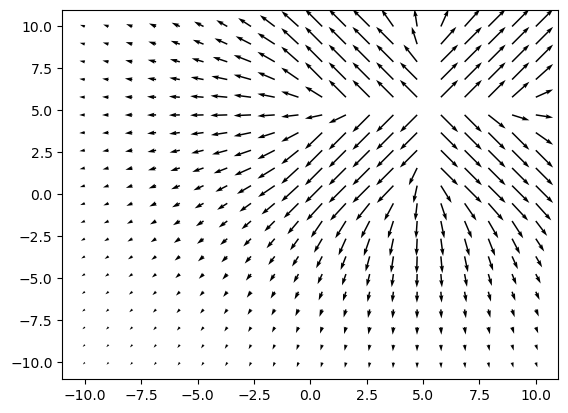

In [68]:
vector_plot(E_func)

#### สนามไฟฟ้าเนื่องจากประจุแบบจุดหลายตัว
$$\mathbf{E(r)}=\sum_i^N\mathbf{E_i(r)}$$

In [73]:
# ขนาดของประจุแต่ละตัว
Qs = np.array([1e-6, -1e-6, 2.5e-6, -2.5e-6])
# ตำแหน่งของประจุ
rps = np.array([[-1,-1], [-1, 1], [1, -1], [1, 1]])
# Function ของสนามไฟฟ้า

def E_func(x, y):
    Etotal = 0
    for i, Q in enumerate(Qs):
        r = np.array([x, y])
        rp = rps[i]
        R = r - rp
        E = Q / (4.0 * pi * epsilon_0) * R / norm(R)**3
        Etotal += E
    return Etotal

In [74]:
E_func(1, 5)

array([-129.914931957276, -968.9464546954275])

#### Plot สนามไฟฟ้าโดยใช้ฟังก์ชัน field_plot()

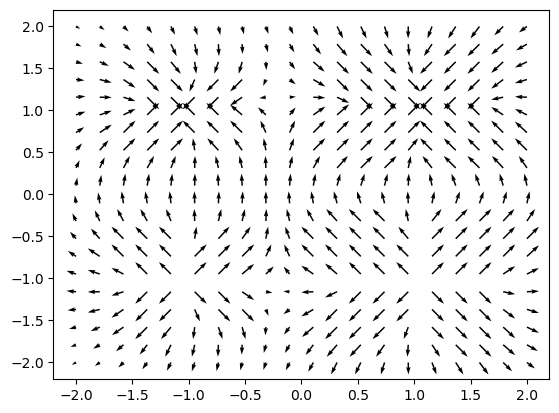

In [77]:
field_plot(E_func, x_min=-2, x_max=2, y_min=-2, y_max=2)

#### โจทย์เพิ่มเติม:
จงคำนวณหาสนามไฟฟ้าที่เกิดจากประจุแบบจุด แต่ละตัวมีขนาดเท่ากัน คือ 1 $\mu C$ วางเป็นเส้นตรงยาว 1 m โดยมีระยะห่างกัน 1 cm 